# Research questions

Shark related attacks according to sex.
- Shark related attacks according to sex, throughout history

Shark related deaths according to sex.
- Shark related deaths according to sex, throughout history

Young sailors:
- Shark related child deaths according to sex throughout history

What is a shark's favourite meal?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/df_projectI.csv")

## Shark related attacks according to sex

In [3]:
sns.set(rc={"figure.figsize": (5, 4)}, font_scale=0.75)
sns.set_style("white")

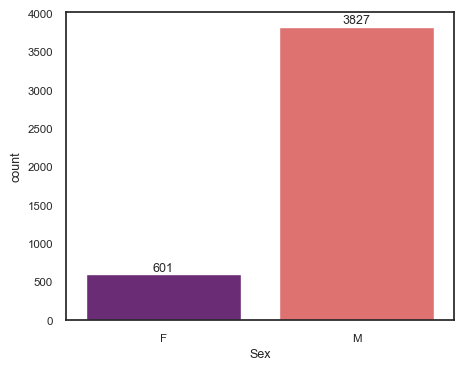

In [4]:
sex_gral = sns.countplot(x=df["Sex"], palette="magma")
sex_gral.bar_label(sex_gral.containers[0]);
sex_gral.figure.savefig("../images/sex_gral.jpg", dpi=1000)

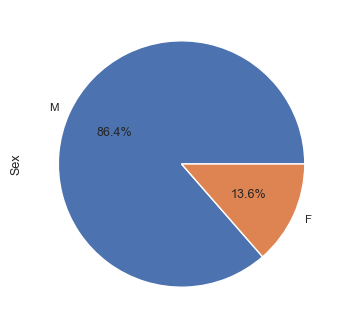

In [5]:
sex_percentage = df["Sex"].value_counts().plot.pie(autopct="%.1f%%");
sex_percentage.figure.savefig("../images/sex_percentage.jpg", dpi=1000)

### Shark related attacks according to sex, throughout history

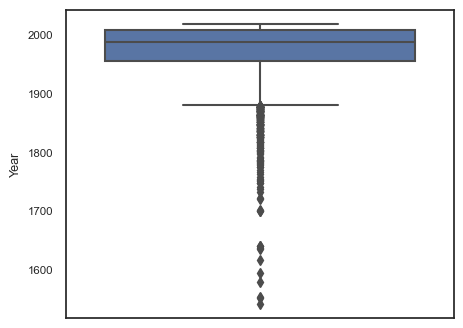

In [6]:
sns.boxplot(y = "Year", data = df); # There is not much information about shark attacks previous to 1880

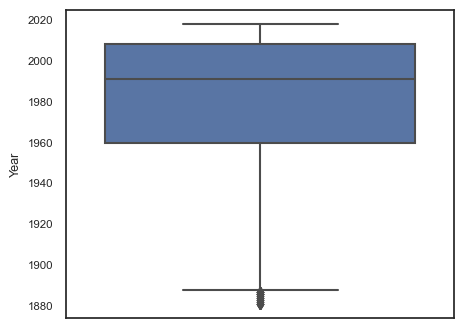

In [7]:
df_history = df[df["Year"] > 1880]
sns.boxplot(y = "Year", data = df_history);

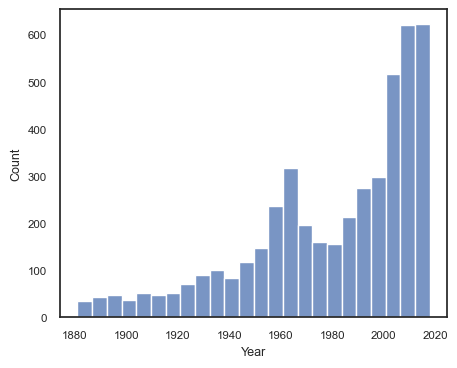

In [8]:
sex_history1880 = sns.histplot(data=df_history, x="Year")

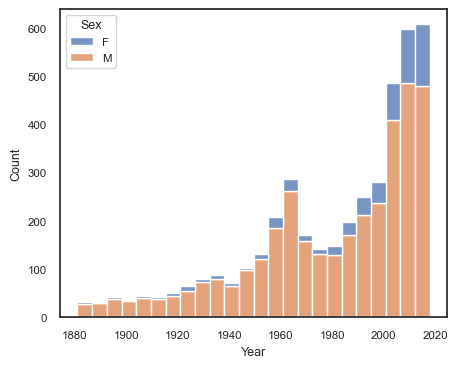

In [9]:
sex_history1880 = sns.histplot(data=df_history, x="Year", hue="Sex", multiple="stack")
sex_history1880.figure.savefig("../images/sex_history1880.jpg", dpi=1000)

## Shark related deaths according to sex

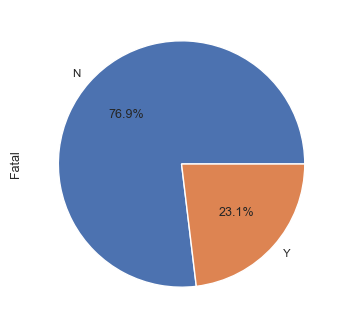

In [10]:
df["Fatal"].value_counts().plot.pie(autopct="%.1f%%");

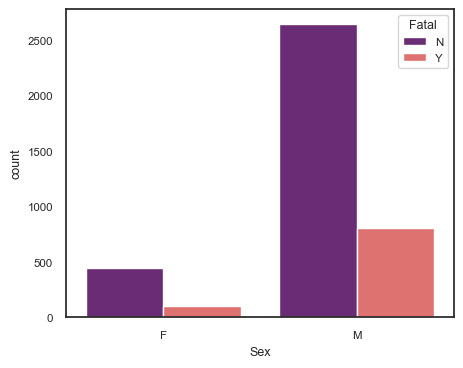

In [11]:
fatal_gral = sns.countplot(x = df["Sex"], hue = df["Fatal"], palette="magma")

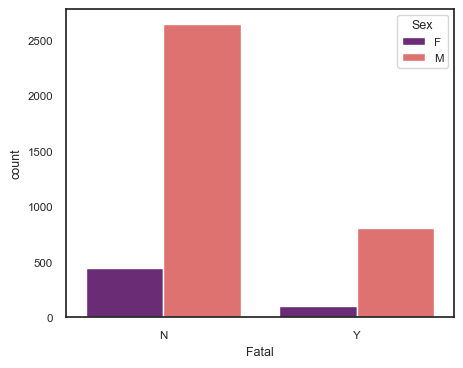

In [12]:
sns.countplot(x = df["Fatal"], hue = df["Sex"], palette="magma");

In [13]:
df_F = df[df["Sex"] == "F"]
df_M = df[df["Sex"] == "M"]

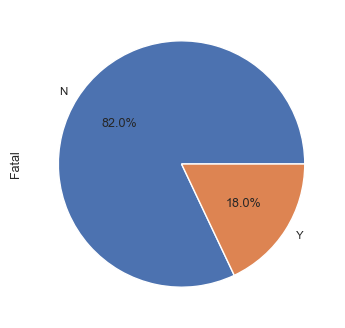

In [14]:
fatal_F = df_F["Fatal"].value_counts().plot.pie(autopct="%.1f%%");
fatal_F.figure.savefig("../images/fatal_F.jpg", dpi=1000)

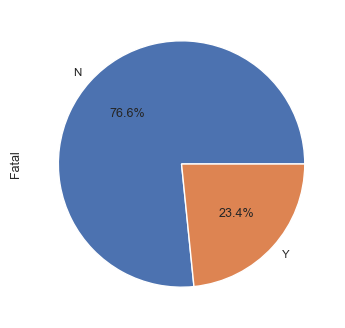

In [15]:
fatal_M = df_M["Fatal"].value_counts().plot.pie(autopct="%.1f%%");
fatal_M.figure.savefig("../images/fatal_M.jpg", dpi=1000)
# Apparently, men die more from shark attacks than women after suffering an attack

### Shark related deaths according to sex, throughout history

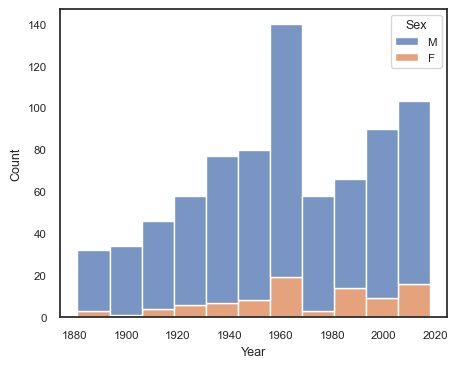

In [16]:
fatalY_history1880 = sns.histplot(data=df_history.loc[df_history["Fatal"] == "Y"], x="Year", hue="Sex", multiple="stack");
fatalY_history1880.figure.savefig("../images/fatalY_history1880.jpg", dpi=1000)

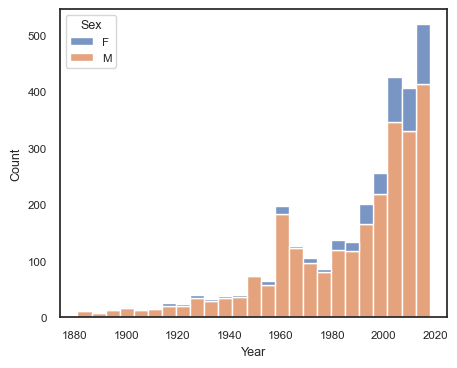

In [17]:
fatalN_history1880 = sns.histplot(data=df_history.loc[df_history["Fatal"] == "N"], x="Year", hue="Sex", multiple="stack");
fatalN_history1880.figure.savefig("../images/fatalN_history1880.jpg", dpi=1000)

## Shark related child deaths according to sex throughout history

In [18]:
mask_kids = pd.DataFrame(df.loc[(df["Age"] < 13)])
mask_kidsfatal = pd.DataFrame(df.loc[(df["Age"] < 13) & (df["Fatal"] == "Y")])

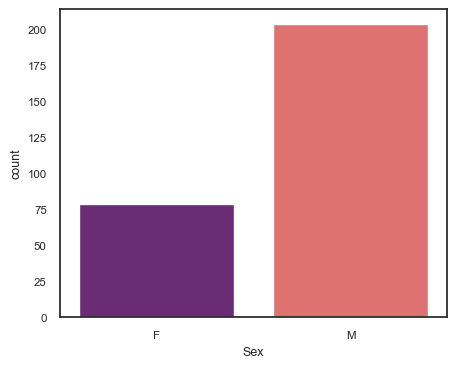

In [19]:
sns.countplot(x = mask_kids["Sex"], palette="magma");

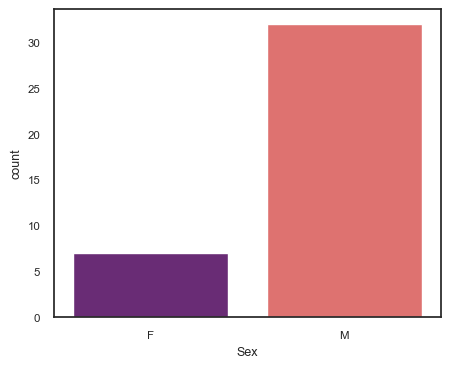

In [20]:
sns.countplot(x = mask_kidsfatal["Sex"], palette="magma");

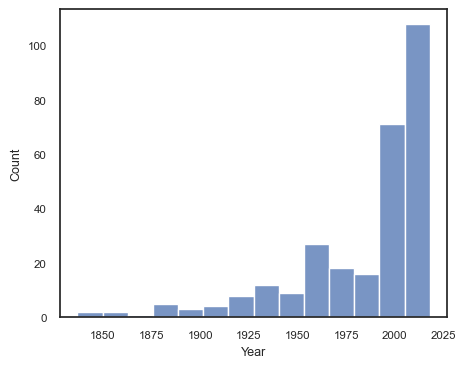

In [21]:
sns.histplot(data=mask_kids, x="Year");

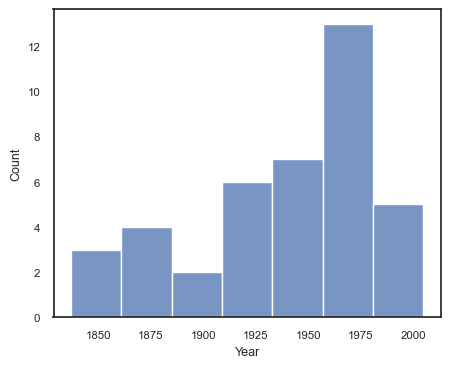

In [22]:
sns.histplot(data=mask_kidsfatal, x="Year");

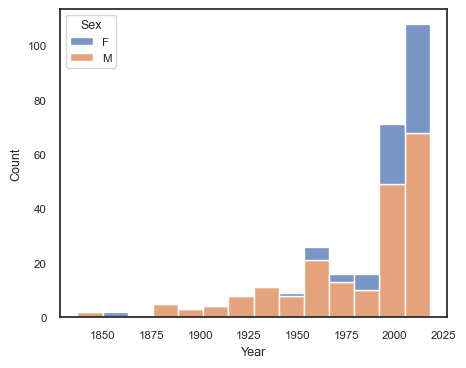

In [23]:
MFKid_attacks = sns.histplot(data=mask_kids, x="Year", hue="Sex", multiple="stack");
MFKid_attacks.figure.savefig("../images/MFKid_attacks.jpg", dpi=1000)

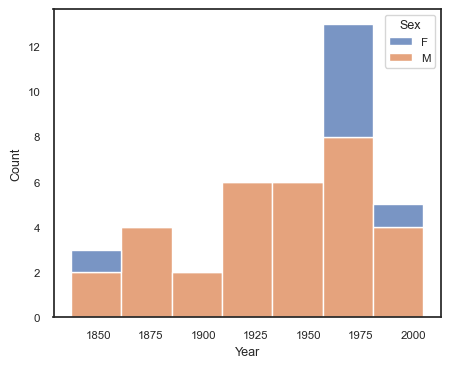

In [24]:
MFKid_deaths = sns.histplot(data=mask_kidsfatal, x="Year", hue="Sex", multiple="stack");
MFKid_deaths.figure.savefig("../images/MFKid_deaths.jpg", dpi=1000)

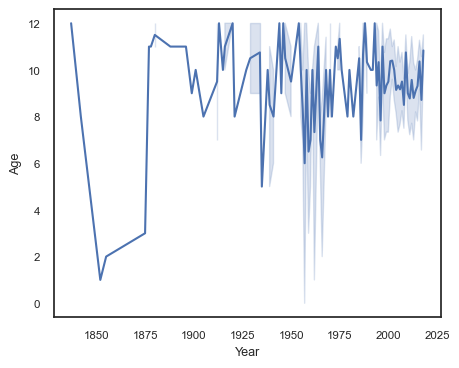

In [25]:
sns.lineplot(data=mask_kids, x="Year", y="Age");

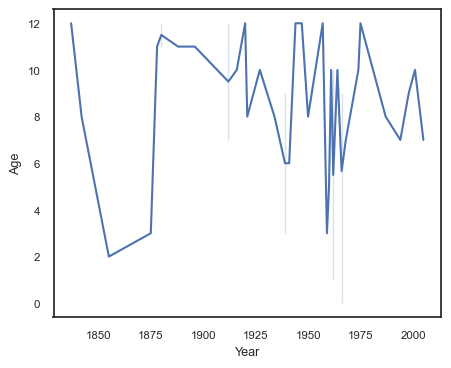

In [26]:
sns.lineplot(data=mask_kidsfatal, x="Year", y="Age");

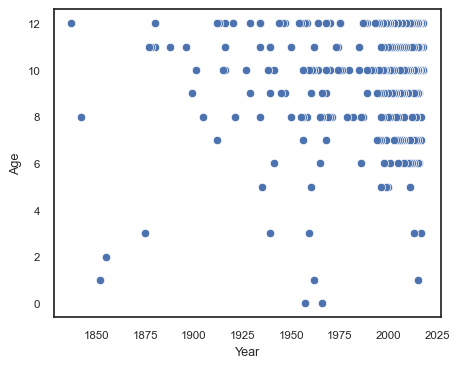

In [27]:
sns.scatterplot(data=mask_kids, x="Year", y ="Age"); #Not clear, recategorise the Age

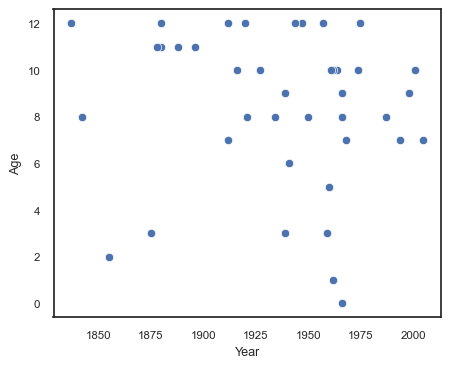

In [28]:
sns.scatterplot(data=mask_kidsfatal, x="Year", y ="Age"); #Not clear, recategorise the Age

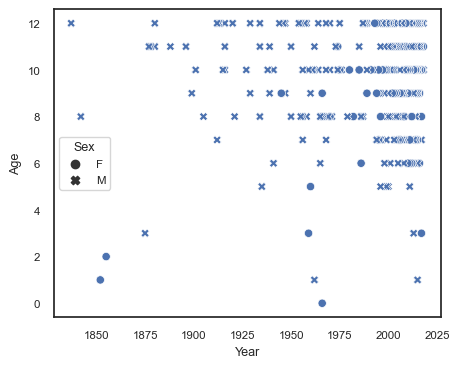

In [29]:
sns.scatterplot(data=mask_kids, x="Year", y ="Age", style="Sex"); #Not clear, recategorise the Age

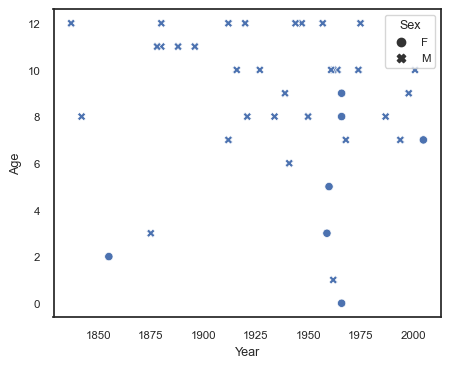

In [30]:
sns.scatterplot(data=mask_kidsfatal, x="Year", y ="Age", style="Sex"); #Not clear, recategorise the Age

In [31]:
mask_toddler = (mask_kids["Age"] < 3)
mask_preschool = (mask_kids["Age"] >= 3) & (mask_kids["Age"] < 6)
mask_school = (mask_kids["Age"] >= 6) & (mask_kids["Age"] < 12)

mask_kids.loc[mask_toddler, "Age_categ"] = "Toddler"
mask_kids.loc[mask_preschool, "Age_categ"] = "Preschooler"
mask_kids.loc[mask_school, "Age_categ"] = "School-aged"

mask_kids["Age_categ"].value_counts()

School-aged    201
Preschooler     11
Toddler          6
Name: Age_categ, dtype: int64

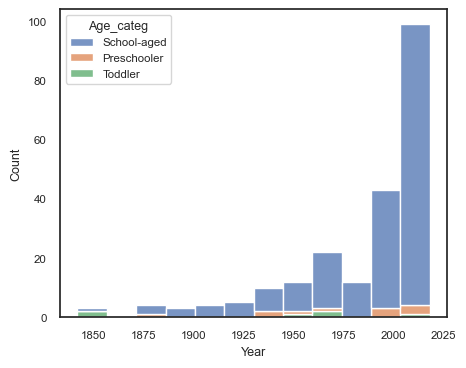

In [32]:
kid_attacks = sns.histplot(data=mask_kids, x="Year", hue = "Age_categ", multiple="stack");
kid_attacks.figure.savefig("../images/kid_attacks.jpg", dpi=1000)

In [33]:
mask_fataltoddler = (mask_kidsfatal["Age"] < 3)
mask_fatalpreschool = (mask_kidsfatal["Age"] >= 3) & (mask_kidsfatal["Age"] < 6)
mask_fatalschool = (mask_kidsfatal["Age"] >= 6) & (mask_kidsfatal["Age"] < 12)

mask_kidsfatal.loc[mask_fataltoddler, "Age_categ"] = "Toddler"
mask_kidsfatal.loc[mask_fatalpreschool, "Age_categ"] = "Preschooler"
mask_kidsfatal.loc[mask_fatalschool, "Age_categ"] = "School-aged"

mask_kidsfatal["Age_categ"].value_counts()

School-aged    25
Preschooler     4
Toddler         3
Name: Age_categ, dtype: int64

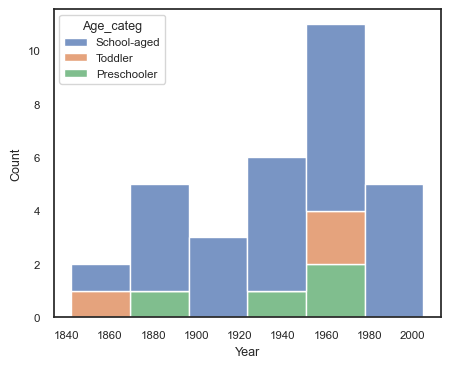

In [34]:
kid_deaths = sns.histplot(data=mask_kidsfatal, x="Year", hue = "Age_categ", multiple="stack");
kid_deaths.figure.savefig("../images/kid_deaths.jpg", dpi=1000)

## What is a shark's favourite meal?

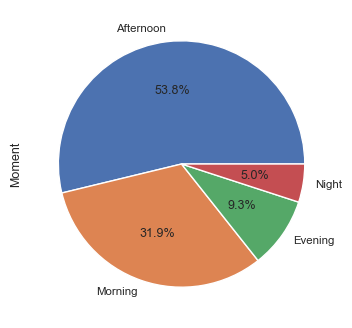

In [35]:
df["Moment"].value_counts().plot.pie(autopct="%.1f%%");

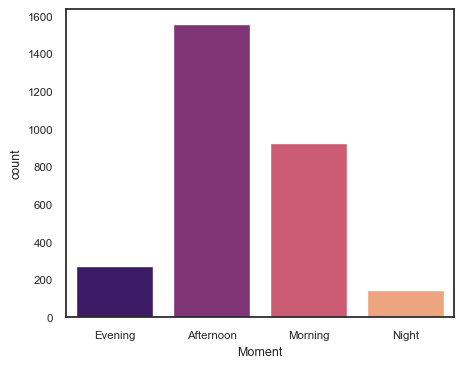

In [36]:
sns.countplot(x=df["Moment"], palette="magma");

In [37]:
df["Moment"].isna().sum() #NaN: 1918; and not NaN: 2895

1918

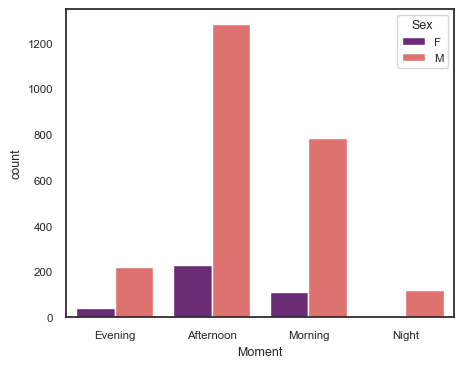

In [38]:
sns.countplot(x=df["Moment"], hue=df["Sex"], palette="magma");